In [1]:
# %load ../python_scripts/calor_2d.py
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
%matplotlib inline



[-0.15608715 -0.21768977 -0.24657333 ..., -0.04989615 -0.0439276
 -0.03141285]


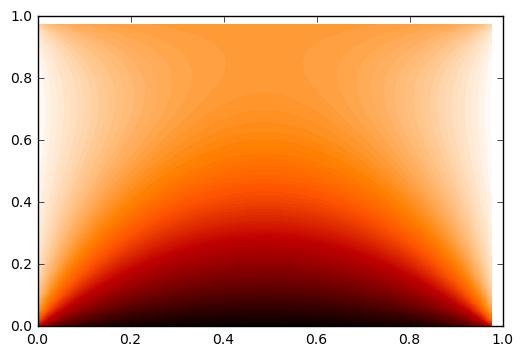

In [2]:
#h=0.5
n=40
h=1/n
Laplacian = np.diag(-4*np.ones((n**2)))
#b= [np.ones(n**2/2)np.zeros(n**2/2)]
#b=10000*np.random.rand(n**2)
b=np.concatenate((500*np.ones(n), np.zeros(n**2-2*n), 100*np.ones(n)), axis=0)
#b=np.arange(0,n**2)
for i in range(0,n**2-1):
    if(i%n!=n-1):
        Laplacian[i,i+1] = 1
        Laplacian[i+1,i] = 1
for i in range(0,n**2-n):
    Laplacian[i,i+n] = 1
    Laplacian[i+n,i] = 1
Laplacian=(1/h**2)*Laplacian

x = np.linalg.solve(Laplacian, b)
print(x)


malha=np.ones([n**2,2])
for i in range (n):
    for j in range(n):
        malha[i*n+j][0]= i/n
        malha[i*n+j][1]= j/n

#print(malha.shape)
#print(Laplacian.shape)

f= plt.figure()
teste=plt.tricontourf(malha[:,1], malha[:,0],x[:],100,cmap=cm.gist_heat) # choose 200 contour levels, just to show how good its interpolation is
#f.colorbar(teste, shrink=0.5, aspect=5)
plt.show()